In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('market_basket.csv')
df.head(10)

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
5,6,02/01/2016,5010,6,JPI,GVBRC,1.0,10.77
6,7,02/01/2016,1666,7,XG4,AHAE7,1.0,3.65
7,8,02/01/2016,1666,7,FEW,AHZNS,1.0,8.21
8,9,02/01/2016,1253,8,0H2,9STQJ,1.0,8.25
9,10,02/01/2016,5541,9,N5F,7IE9S,1.0,8.18


In [5]:
df.tail()

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57
131705,131706,04/07/2016,20203,32900,Q4N,QM9BP,1.0,13.68


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.shape

(131706, 7)

In [8]:
# do luong du lieu lon -> su dung Apriori thay vi Eclat

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            131706 non-null  object 
 1   Customer_ID     131706 non-null  int64  
 2   Transaction_ID  131706 non-null  int64  
 3   SKU_Category    131706 non-null  object 
 4   SKU             131706 non-null  object 
 5   Quantity        131706 non-null  float64
 6   Sales_Amount    131706 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [10]:
df.isnull().sum()

Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
dtype: int64

In [11]:
df.nunique()

Date                363
Customer_ID       22625
Transaction_ID    64682
SKU_Category        187
SKU                5242
Quantity             83
Sales_Amount       3233
dtype: int64

In [12]:
df.describe()

,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000
mean,12386.450367,32389.604187,1.485311,11.981524
std,6086.447552,18709.901238,3.872667,19.359699
min,1.000000,1.000000,0.010000,0.020000
25%,7349.000000,16134.000000,1.000000,4.230000
50%,13496.000000,32620.000000,1.000000,6.920000
75%,17306.000000,48548.000000,1.000000,12.330000
max,22625.000000,64682.000000,400.000000,707.730000


In [13]:
df.describe(include=['O'])

,Date,SKU_Category,SKU
count,131706,131706,131706
unique,363,187,5242
top,23/09/2016,N8U,UNJKW
freq,638,10913,2007


In [14]:
# convert dates to datetime datatype
df['Date']= pd.to_datetime(df['Date'])

In [15]:
df['Date'].value_counts()

2016-09-23    638
2016-12-15    614
2016-09-22    606
2016-05-13    602
2016-12-16    594
             ... 
2016-07-31    128
2016-03-01    111
2016-08-28    107
2016-12-24    100
2016-03-28     73
Name: Date, Length: 363, dtype: int64

In [16]:
# group by Customer_ID

In [17]:
basket = (df.groupby(['Customer_ID', 'SKU'])['Quantity']
         .sum().unstack().reset_index().fillna(0)
         .set_index('Customer_ID'))

basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Apriori

In [18]:
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
    else: 
        return False



In [19]:
basket = basket.applymap(encode_units)

In [20]:
basket

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
Customer_ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22622,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df_apriori = apriori(basket, min_support=0.002, use_colnames=True)
df_apriori.head()

,support,itemsets
0,0.002122,(096VW)
1,0.003006,(09LL9)
2,0.002873,(0AEJH)
3,0.002387,(0B8JX)
4,0.002740,(0D3EZ)


In [22]:
rules = association_rules(df_apriori, metric="lift", min_threshold=1)

In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6V2Q8),(3483Q),0.005613,0.006144,0.002033,0.362205,58.955985,0.001999,1.558269
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
2,(3QNEE),(5O2CO),0.003624,0.002785,0.002166,0.597561,214.600271,0.002156,2.477929
3,(5O2CO),(3QNEE),0.002785,0.003624,0.002166,0.777778,214.600271,0.002156,4.483691
4,(UNJKW),(3SZO0),0.072840,0.014453,0.002431,0.033374,2.309119,0.001378,1.019574
...,...,...,...,...,...,...,...,...,...
83,(UNJKW),(TL4WZ),0.072840,0.018298,0.002298,0.031553,1.724386,0.000965,1.013687
84,(UNJKW),(UQC6F),0.072840,0.014541,0.002740,0.037621,2.587183,0.001681,1.023982
85,(UQC6F),(UNJKW),0.014541,0.072840,0.002740,0.188450,2.587183,0.001681,1.142456
86,(UNJKW),(W1ZMG),0.072840,0.018829,0.003006,0.041262,2.191446,0.001634,1.023399


In [27]:
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
53,(UNJKW),(COWU2),0.072840,0.030099,0.006630,0.091019,3.023956,0.004437,1.067020
52,(COWU2),(UNJKW),0.030099,0.072840,0.006630,0.220264,3.023956,0.004437,1.189070
79,(M6J9W),(UNJKW),0.025812,0.072840,0.004773,0.184932,2.538881,0.002893,1.137524
78,(UNJKW),(M6J9W),0.072840,0.025812,0.004773,0.065534,2.538881,0.002893,1.042508
81,(OV1P9),(UNJKW),0.027094,0.072840,0.004155,0.153344,2.105226,0.002181,1.095085
...,...,...,...,...,...,...,...,...,...
33,(9Y7M0),(LJ26I),0.008309,0.008309,0.002033,0.244681,29.446299,0.001964,1.312942
1,(3483Q),(6V2Q8),0.006144,0.005613,0.002033,0.330935,58.955985,0.001999,1.486234
41,(B87MU),(C6TXL),0.008619,0.020818,0.002033,0.235897,11.331591,0.001854,1.281480
40,(C6TXL),(B87MU),0.020818,0.008619,0.002033,0.097665,11.331591,0.001854,1.098684


In [29]:
# dua tren ket qua => 
# san pham co support lon nhat la (UNJKW), ket hop voi san pham (COWU2)	

In [32]:
support=rules['support'].values
confidence=rules['confidence'].values
lift = rules['lift'].values

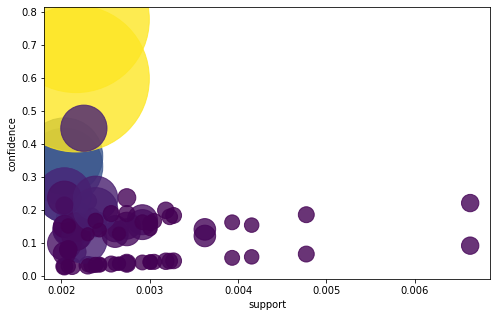

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(support, confidence, s= lift*100,alpha=0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [31]:
# 15 san pham duoc mua nhieu nhat:

In [38]:
result = basket.apply(pd.value_counts).fillna(0)
result

SKU,00GVC,00OK1,0121I,01IEO,01IQT,01L05,01V7M,01XVY,029WA,03C6L,...,ZWNCK,ZWWB5,ZX2UM,ZY9N9,ZYF2U,ZZ2AO,ZZDW7,ZZM1A,ZZNC5,ZZX6K
False,22623,22610,22602,22591,22619,22619,22589,22624,22623,22594,...,22624,22620,22624,22622,22612,22624,22623,22601,22624,22624
True,2,15,23,34,6,6,36,1,2,31,...,1,5,1,3,13,1,2,24,1,1


In [39]:
df_true = result.iloc[1,:]
df_true[:15]

SKU
00GVC     2.0
00OK1    15.0
0121I    23.0
01IEO    34.0
01IQT     6.0
01L05     6.0
01V7M    36.0
01XVY     1.0
029WA     2.0
03C6L    31.0
03CPI     3.0
03K3G     3.0
04KDD     1.0
050FN     1.0
055SH    13.0
Name: True, dtype: float64

In [40]:
x = df_true.sort_values(ascending=False)

In [41]:
top_products = x[:15]
top_products

SKU
UNJKW    1648.0
COWU2     681.0
OV1P9     613.0
M6J9W     584.0
CZUZX     550.0
E3PAN     478.0
A59HR     473.0
C6TXL     471.0
7GQRJ     437.0
W1ZMG     426.0
DMJ70     416.0
TL4WZ     414.0
EMJ1S     409.0
QGK3S     409.0
M4TM4     407.0
Name: True, dtype: float64

In [42]:
pos = np.arange(len(top_products.values))

Text(0.5, 1.0, '15 products best buy')

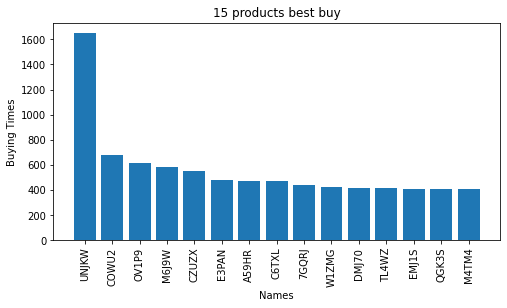

In [47]:
plt.figure(figsize=(8,4))
plt.bar(pos, top_products.values, align='center')
plt.xticks(pos, top_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products best buy')

In [48]:
# 15 san pham duoc mua it nhat:

In [53]:
worst_products = x.tail(15)
worst_products

SKU
FHCRT    1.0
6GM39    0.0
XY1DR    0.0
9DJOL    0.0
LJSFV    0.0
U5KIY    0.0
OSUCY    0.0
D0APX    0.0
XMHTE    0.0
05ZN9    0.0
CO8TB    0.0
Z8IA4    0.0
0FWL7    0.0
XB8QU    0.0
ZEN7K    0.0
Name: True, dtype: float64

In [54]:
pos_1 = np.arange(len(worst_products.values))

Text(0.5, 1.0, '15 products worst buy')

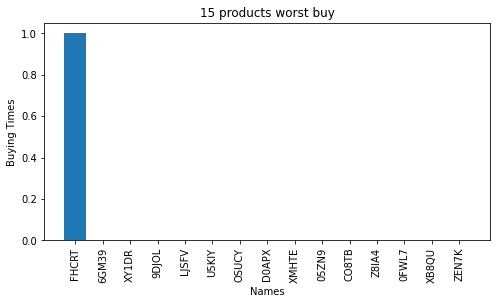

In [55]:
plt.figure(figsize=(8,4))
plt.bar(pos_1, worst_products.values, align='center')
plt.xticks(pos_1, worst_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products worst buy')